<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

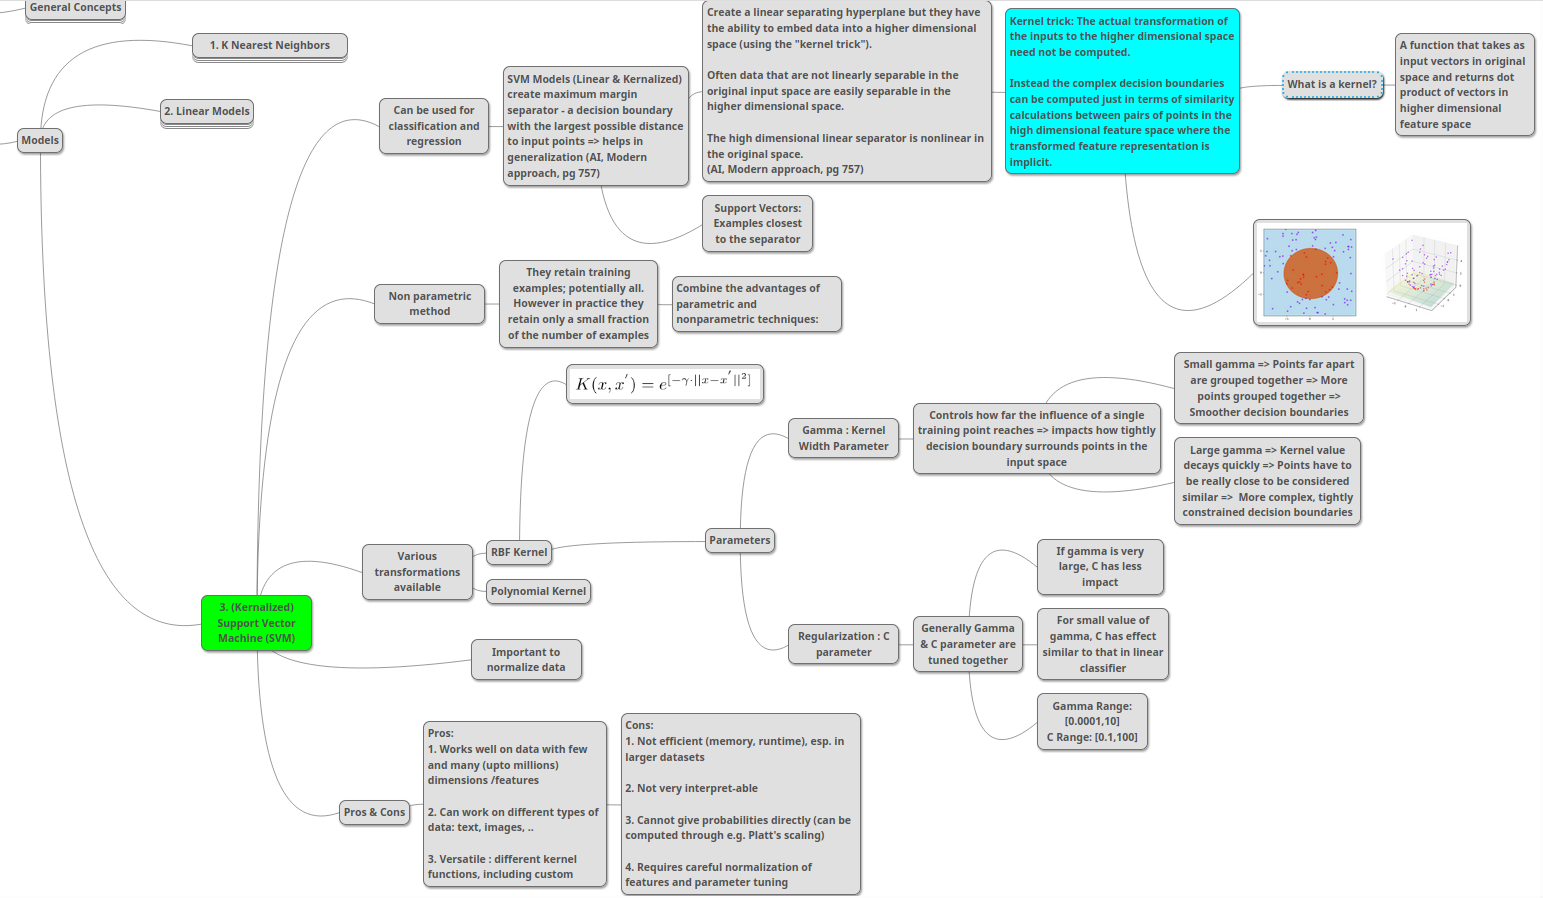

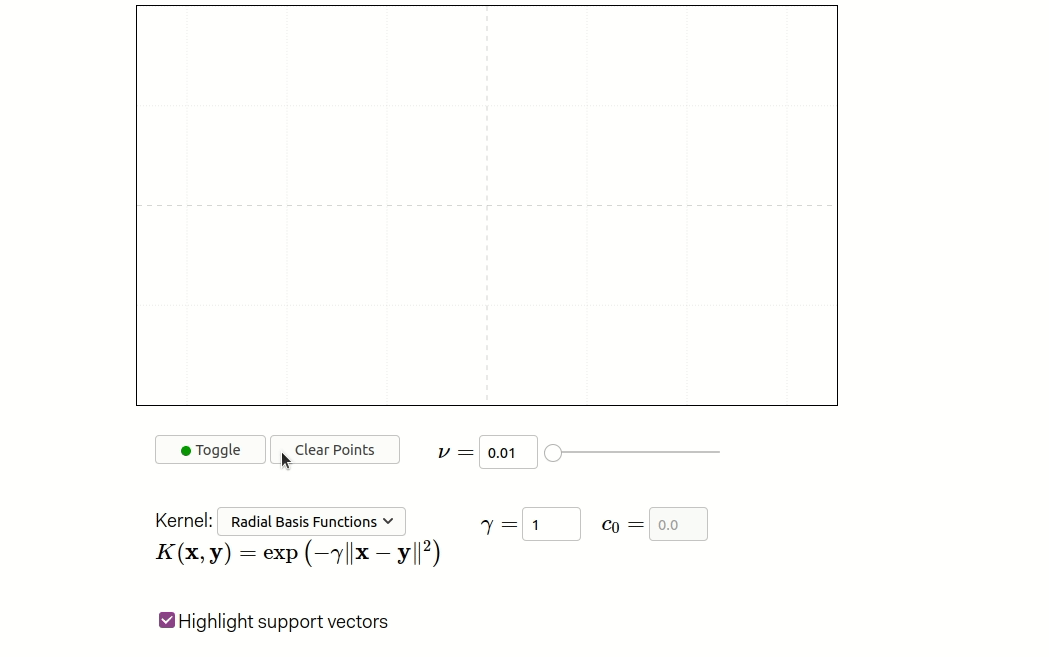

[Visualization Reference](https://jgreitemann.github.io/svm-demo) 


## Case studies

In [1]:
### Setup 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!cp "/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/adspy_shared_utilities.py" .
!cp "/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/CommViolPredUnnormalizedData.txt" .

### 1. Synthetic dataset

In [5]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [6]:
X_D2,y_D2 = make_blobs(n_samples=100,centers=8,random_state=3,n_features=2,cluster_std=1)

In [7]:
y_D2 = y_D2 % 2

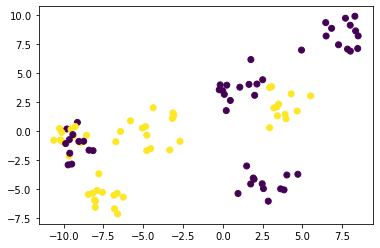

In [8]:
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2)

In [9]:
from adspy_shared_utilities import plot_class_regions_for_classifier,plot_class_regions_for_classifier_subplot

#### RBF Kernel

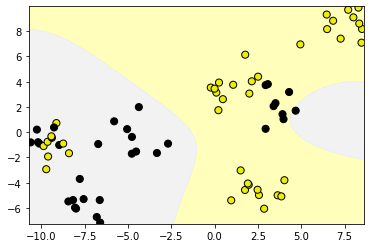

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state = 0)
plot_class_regions_for_classifier(SVC().fit(X_train,y_train),X_train,y_train)

#### Polynomial Kernel

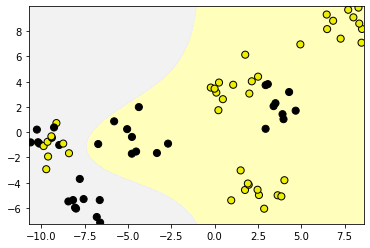

In [11]:
plot_class_regions_for_classifier(SVC(kernel='poly',degree=3).fit(X_train,y_train),X_train,y_train)

#### Vary Gamma parameter

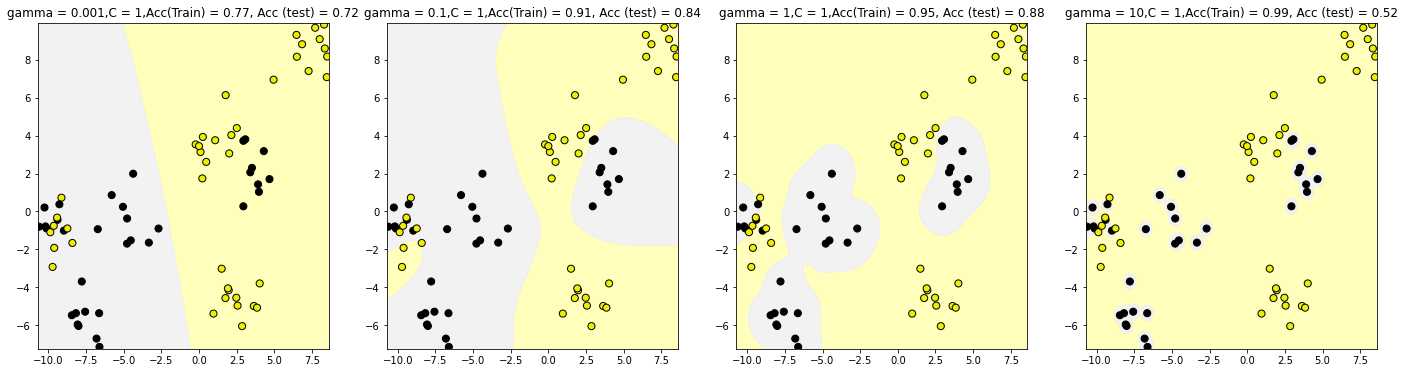

In [12]:
fig,subaxes = plt.subplots(1,4,figsize = (24,6))

for gamma_itn,subaxis in zip([0.001,0.1,1,10],subaxes):
  model_itn = SVC(gamma=gamma_itn)
  model_itn.fit(X_train,y_train)
  title = 'gamma = {},C = 1,Acc(Train) = {}, Acc (test) = {}'.format(gamma_itn,round(accuracy_score(y_train,model_itn.predict(X_train)),2),round(accuracy_score(y_test,model_itn.predict(X_test)),2))
  plot_class_regions_for_classifier_subplot(model_itn,X_train,y_train,None,None,title,subaxis)

#### Vary both gamma and C
  * Gamma values: 0.01, 1, 5
  * C values: 0.1, 1, 15, 250

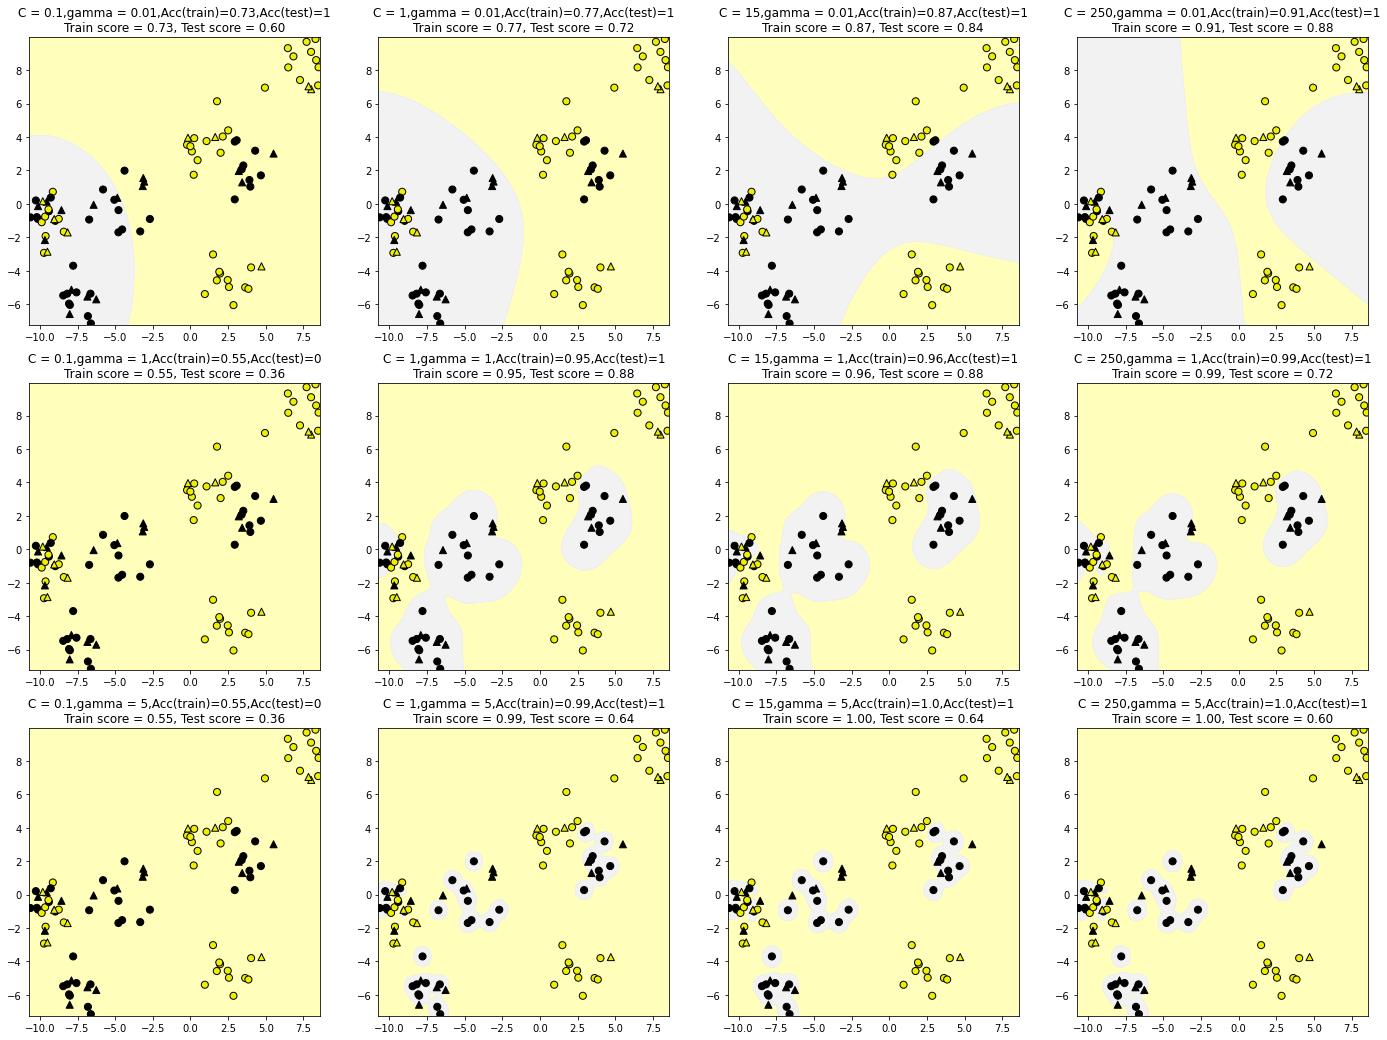

In [13]:
fig,subaxes = plt.subplots(3,4,figsize = (24,18))
for gamma_itn,subaxis in zip([0.01,1,5],subaxes):
  for C_itn,axis_itn in zip([0.1,1,15,250],subaxis):
    model_itn = SVC(C=C_itn,gamma=gamma_itn)
    model_itn.fit(X_train,y_train)
    title = 'C = {},gamma = {},Acc(train)={},Acc(test)={}'.format(C_itn,gamma_itn,
                                                                  round(accuracy_score(y_train,model_itn.predict(X_train)),2),
                                                                  round(accuracy_score(y_test,model_itn.predict(X_test),2)))
    plot_class_regions_for_classifier_subplot(model_itn,X_train,y_train,X_test,y_test,title,axis_itn)


* At high value of gamma, variation in C has less impact on the model.
* Low value of gamma => points far away in the feature space are considered similar
* High value of gamma => influence of each point is less (kernel width = small, kernel value decays quickly) => Points closeby are considered similar 

* C & gamma are varied together depending on the task and data:
  * **C is generally in the range of [0.1,100]**
  * **gamma in the range of [0.0001,10]**

### 2. Breast Cancer Dataset 

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [15]:
X_Cancer,y_Cancer = load_breast_cancer(return_X_y=True)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_Cancer,y_Cancer,random_state = 0)

In [17]:
SVM_Cancer = Pipeline([('scaler',MinMaxScaler()),('model',SVC())])
SVM_Cancer.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [18]:
print("SVM on Breast Cancer Dataset")
print("f1-score : training data = {}".format(round(f1_score(y_train,SVM_Cancer.predict(X_train)),2)))
print("f1-score : test data = {}".format(round(f1_score(y_test,SVM_Cancer.predict(X_test)),2)))

SVM on Breast Cancer Dataset
f1-score : training data = 0.99
f1-score : test data = 0.98


References: 
1. Applied Machine Learning in Python - Coursera Week 2 
2. Theory : http://web.mit.edu/6.034/wwwbob/svm.pdf
3. Artificial Intelligence - A Modern Approach (Third Edition)